In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("Resources/crypto_data_clean.csv")
X

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
3,1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
4,BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
...,...,...,...,...,...
680,ZEPH,SHA-256,DPoS,2.000000e+09,2.000000e+09
681,GAP,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
682,BDX,CryptoNight,PoW,9.802226e+08,1.400223e+09
683,ZEN,Equihash,PoW,7.296538e+06,2.100000e+07


In [3]:
X= X[X['TotalCoinSupply'] != 0]
X

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
3,1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
4,BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
6,LTC,Scrypt,PoW,6.303924e+07,8.400000e+07
...,...,...,...,...,...
680,ZEPH,SHA-256,DPoS,2.000000e+09,2.000000e+09
681,GAP,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
682,BDX,CryptoNight,PoW,9.802226e+08,1.400223e+09
683,ZEN,Equihash,PoW,7.296538e+06,2.100000e+07


In [4]:
X.dtypes

Unnamed: 0          object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [6]:
# convert to dummies
X = pd.get_dummies(X)
X

,TotalCoinsMined,TotalCoinSupply,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2.927942e+10,3.141593e+11,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6.303924e+07,8.400000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
681,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
682,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Scale the data
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(637, 742)

In [8]:
# Reduce the dimensions with Principal Component Analysis (pca)
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
principal_components = pca.fit_transform(X_scaled)

print("Data shape:\t", X_scaled.shape)
print("PAC shape:\t", principal_components.shape)

Data shape:	 (637, 742)
PAC shape:	 (637, 562)


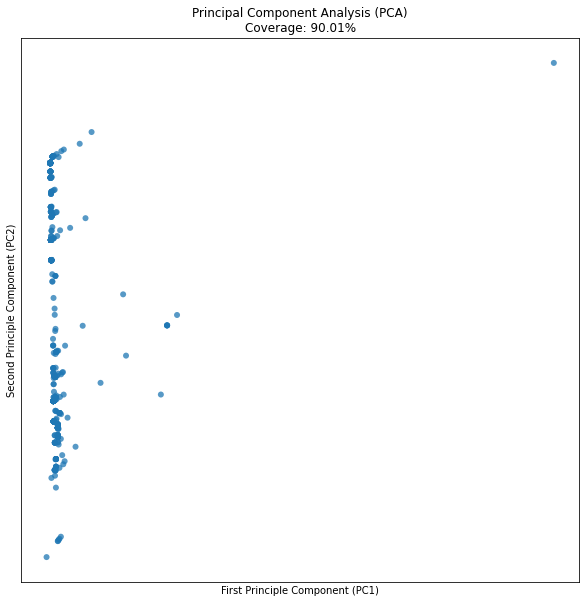

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(
    x = principal_components[:,0],
    y = principal_components[:,1],
    alpha = 0.75,
    edgecolors="none",
)
plt.title("Principal Component Analysis (PCA)\n" + 
          f"Coverage: {round(100 * sum(pca.explained_variance_ratio_), 2)}%")
plt.xlabel('First Principle Component (PC1)')
plt.ylabel('Second Principle Component (PC2)')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
# Reduce the dataset for t-distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_features = tsne.fit_transform(principal_components)
print("Data shape:\t", principal_components.shape)
print("t-SNE shape:\t", tsne_features.shape)

Data shape:	 (637, 562)
t-SNE shape:	 (637, 2)


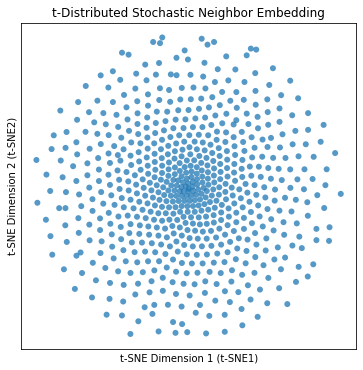

In [11]:
# Plot the t-Distributed Stochastic Neighbor Embedding
plt.figure(figsize=(6, 6))
plt.scatter(
    x = tsne_features[:,0], 
    y = tsne_features[:,1],
    alpha = 0.75,
    edgecolors="none"
)
plt.title("t-Distributed Stochastic Neighbor Embedding")
plt.xlabel('t-SNE Dimension 1 (t-SNE1)')
plt.ylabel('t-SNE Dimension 2 (t-SNE2)')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
# determine the optimal number of clusters for k-means clustering
def kmeans_optimal_clusters(data, clusters):
    k_range = range(1, clusters)
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return k_range, inertia

C:\Users\USApul\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


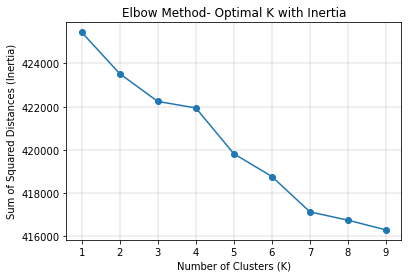

In [13]:
from sklearn.cluster import KMeans
k, inertia = kmeans_optimal_clusters(principal_components, 10)
# Plot the Elbow plot for Inertia
plt.plot(k, inertia, 'o-')
plt.title('Elbow Method- Optimal K with Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(linewidth = 0.4)
plt.show()

## Results
Any of the three models present a precise classification; further data could provide better results. At this point, we can't recommend any classification to be part of the portfolio.